## Project 4, Jupyter Notebooks
### Carter Smith
### May 24, 2024
#### Using the Iris dataset to showcase analysis and vizualizations for data.

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [3]:
#load the Iris dataset into DataFrame
df = sns.load_dataset('iris')

#inspect first rows of the DataFrame
print(df.head())

   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa


In [4]:
#step 2, initial data inspection
print(df.head(10))
print(df.shape)
print(df.dtypes)

   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa
5           5.4          3.9           1.7          0.4  setosa
6           4.6          3.4           1.4          0.3  setosa
7           5.0          3.4           1.5          0.2  setosa
8           4.4          2.9           1.4          0.2  setosa
9           4.9          3.1           1.5          0.1  setosa
(150, 5)
sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object


In [5]:
#step 3, descriptive statistics
print(df.describe())

       sepal_length  sepal_width  petal_length  petal_width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.057333      3.758000     1.199333
std        0.828066     0.435866      1.765298     0.762238
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000


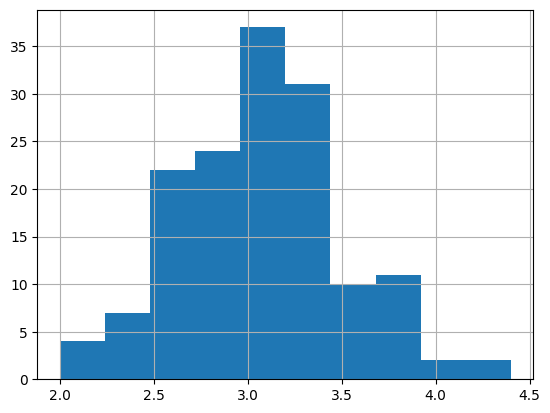

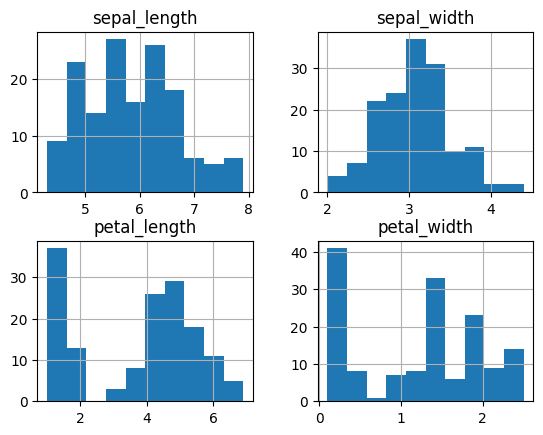

In [8]:
#step 4, distributions

#histogram by column name
df['sepal_width'].hist()

#histograms for all numerical columns
df.hist()

#show plots
plt.show()

### Step 4 Histograms
After generating initial histograms for the iris dataset, a few things that stuck out to me are:
- Sepal length is skewed to the right, meaning there are a few outliers with higher length
- Sepal width follows a relatively normal distribution
- Petal length and width show bimodal distributions

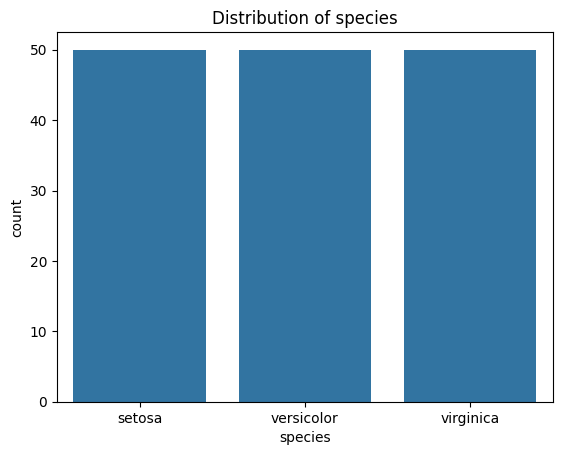

In [7]:
#step 5, categorical columns
# Inspect value counts by categorical column
df['species'].value_counts()

# Inspect value counts for all categorical columns
for col in df.select_dtypes(include=['object', 'category']).columns:
    # Display count plot
    sns.countplot(x=col, data=df)
    plt.title(f'Distribution of {col}')
    plt.show()

# Show all plots
plt.show()

### Step 4 Categorical Distribution
After plotting the count for each species in the iris dataset the distribution is as follows:
| Species | Count |
| ------- | ----- |
| Setosa  | 50 |
| Versicolor | 50 |
| Virginica | 50 |

In [9]:
#step 6, data transformation and feature engineering
# Renaming columns
df.rename(columns={'sepal_length': 'Sepal Length'}, inplace=True)
df.rename(columns={'sepal_width': 'Sepal Width'}, inplace=True)
df.rename(columns={'petal_length': 'Petal Length'}, inplace=True)
df.rename(columns={'petal_width': 'Petal Width'}, inplace=True)

# Adding new columns
df['Sepal Area'] = df['Sepal Length'] * df['Sepal Width']
df['Petal Area'] = df['Petal Length'] * df['Petal Width']


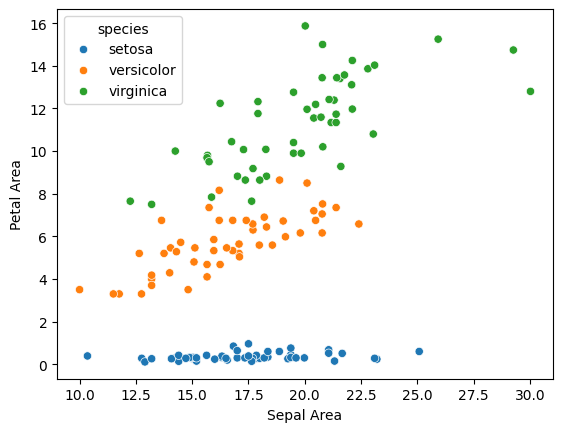

In [14]:
#step 7, visualizations
#sns.pairplot(df, hue='species')
sns.scatterplot(data=df, x="Sepal Area", y="Petal Area", hue="species")
plt.show()

### Sepal Area and Petal Area Scatterplot
The petal area graphed against the sepal area for virginica and versicolor shows a positive correlation, as sepal area increases, so does the petal area. Interestingly, setosa does not follow this trend. As the sepal area for setosa increases the petal area remains about constant.

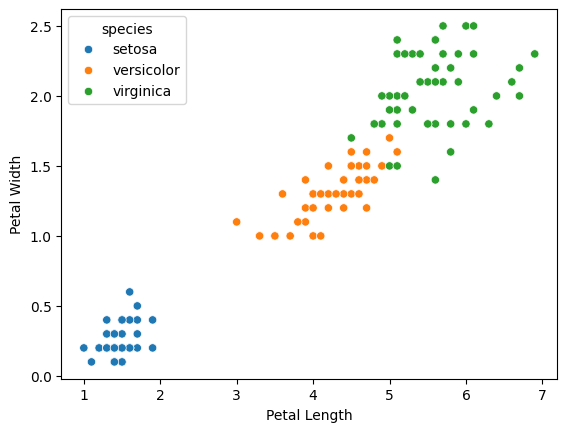

In [16]:
sns.scatterplot(data=df, x="Petal Length", y="Petal Width", hue="species")
plt.show()

### Petal Width and Petal Length Scatterplot
The petal length graphed against width shows a positive correlation between the two, as length increases, width generally does as well. Looking at the individual species, setosa is the smallest for both petal length and petal width, with a weaker correlation between the variables. versicolor and virginica show a stronger positive correlation between length and width, with virginica generally being the largest.

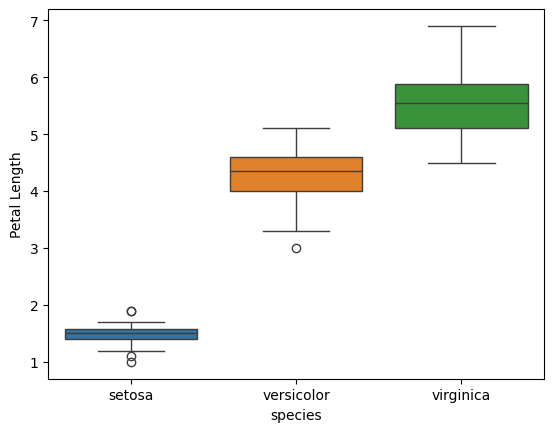

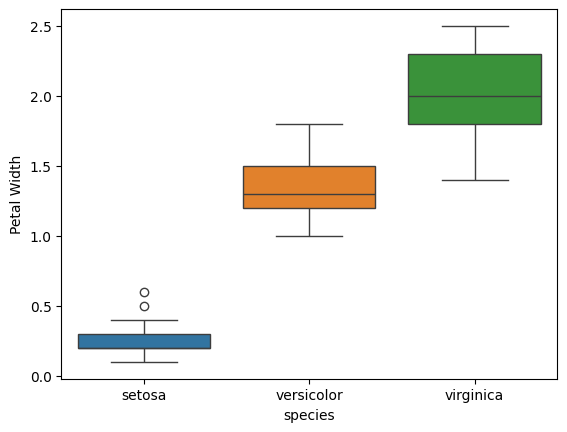

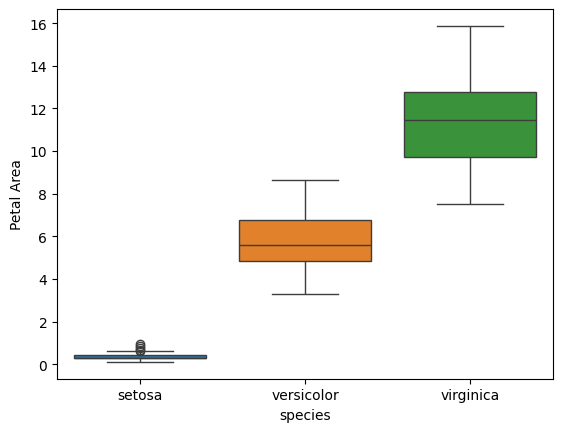

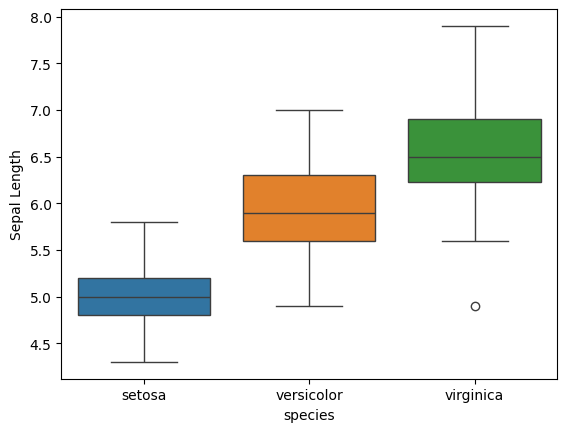

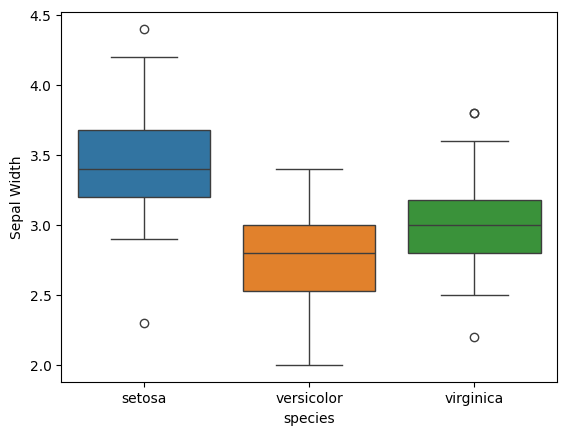

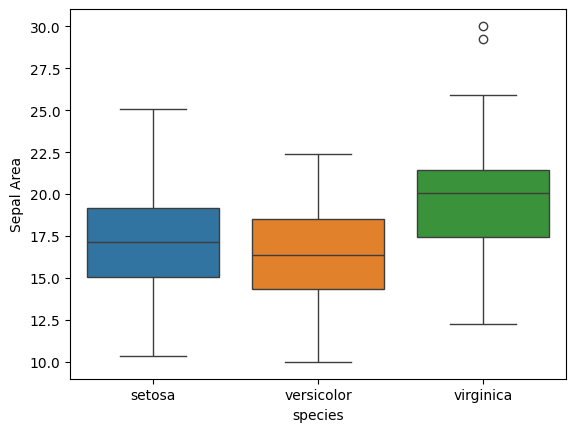

In [17]:
variables = ['Petal Length','Petal Width','Petal Area','Sepal Length','Sepal Width','Sepal Area',]
for v in variables:
    sns.boxplot(data=df, x="species", y=v, hue="species")
    plt.show()



### Boxplots
I generated boxplots for each variable, showing the maximum value, minimum, median, quartiles and any outliers for each species. Some interesting things are that setosa is the smallest on all except sepal width and area, setosa generally has the smallest grouping of the species with the minimum, maximum and outliers all being relatively close.